# Tutorial 2-b: Manual Feature Extraction/Engineering

---

### Introduction

In this notebook, we will extract/engineer features traditional statisitcal methods, suggested methods:
- Discrete Lablacian
- magnitude squared
- Fourier transformer


First we import some libraries:

In [138]:
import matplotlib.pyplot as plt # for plotting data/graphs
import numpy as np # For handling N-DIMENSIONAL ARRAYS
import pandas as pd # for importing data into data frame format

from scipy import ndimage, misc # ndimage: contains various functions for multidimensional image processing
                               # misc: Various utilities that don’t have another home.
import matplotlib.pyplot as plt


---

### Reading in data

In [139]:
from galaxy_mnist import GalaxyMNISTHighrez

dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default, or False for canonical test set
)

In [140]:
images_train = dataset_train.data
images_test = dataset_test.data



In [141]:
labels_train = dataset_train.targets
labels_test = dataset_test.targets

In [142]:
class0_tr = np.where (np.array(labels_train) == 0 )
class1_tr = np.where (np.array(labels_train) == 1 )
class2_tr = np.where (np.array(labels_train) == 2 )
class3_tr = np.where (np.array(labels_train) == 3 )
#---
class0_te = np.where (np.array(labels_test) == 0 )
class1_te = np.where (np.array(labels_test) == 1 )
class2_te = np.where (np.array(labels_test) == 2 )
class3_te = np.where (np.array(labels_test) == 3 )

### Pre-processing 

In [143]:
from source.pre import pre_processing #  A predefined function to pre-process the data as we did in tutorial 1

In [144]:
# pre-processing(data, size) function takes two arguments
# 1. data: the data to be processed
# 2. The size for which the data needs to be reduced.
images_trainPre = pre_processing(images_train, 112)
images_testPre = pre_processing(images_test, 112)

In [145]:
images_trainPre.shape

(8000, 112, 112)

Displaying images after pre-processing

label: smooth_round


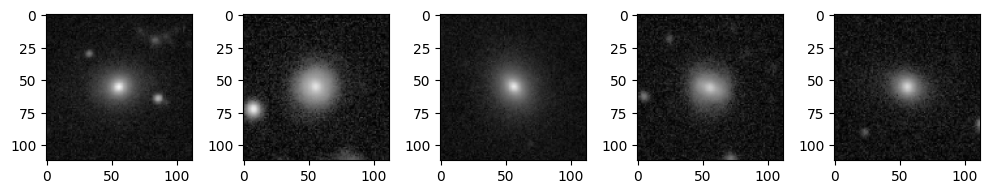

label: smooth_cigar


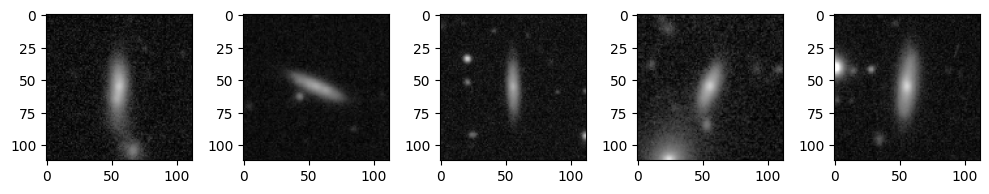

label: edge_on_disk


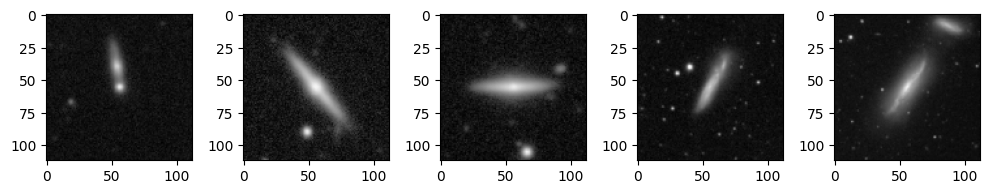

label: unbarred_spiral


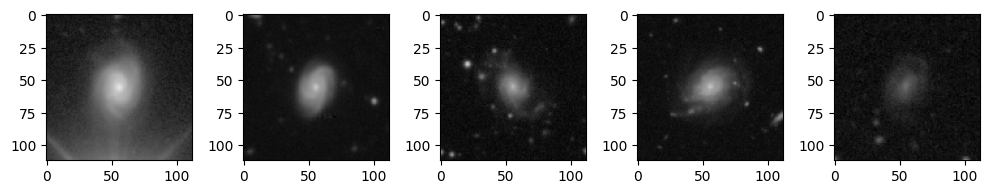

In [146]:
rows = 1
columns = 5
for classArr in [ [class0_tr,0], [class1_tr,1], [class2_tr,2], [class3_tr,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        train_image = images_trainPre[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_image*255,cmap='gray', vmin=0, vmax=255 )
    print("label: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()  

---

### Diffrint image pre-processing tools,
more can be found [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html)

#### [laplace](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html)

Origina: smooth_round


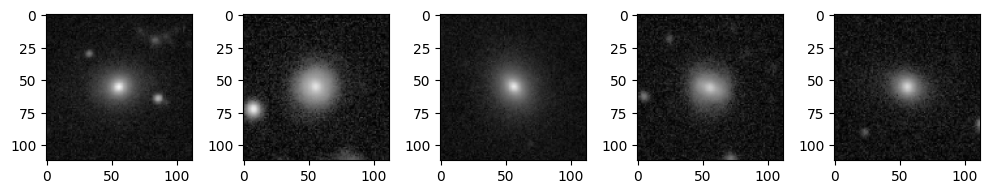

reconstructed: smooth_round


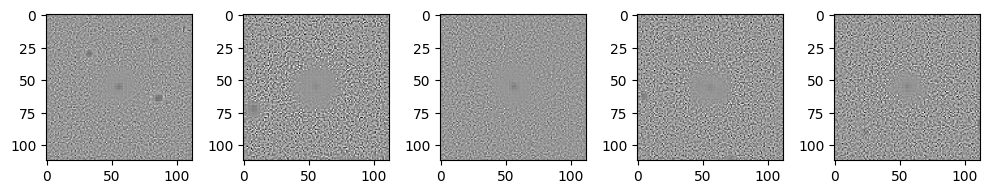

                       ______________________________________________________________________________     
Origina: smooth_cigar


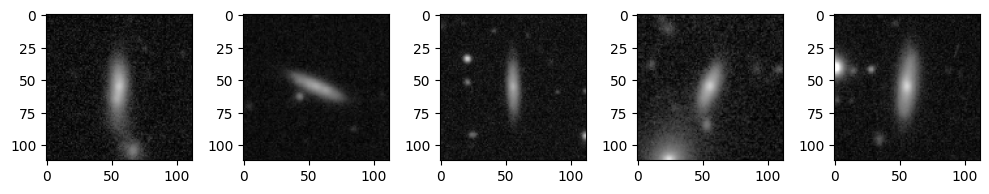

reconstructed: smooth_cigar


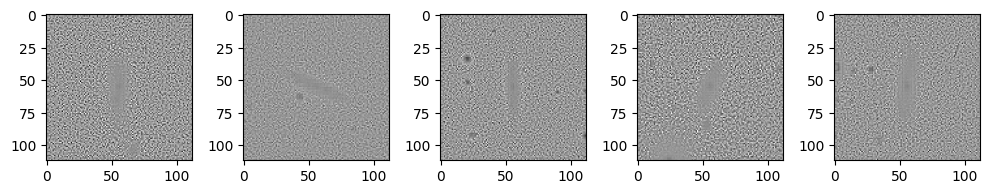

                       ______________________________________________________________________________     
Origina: edge_on_disk


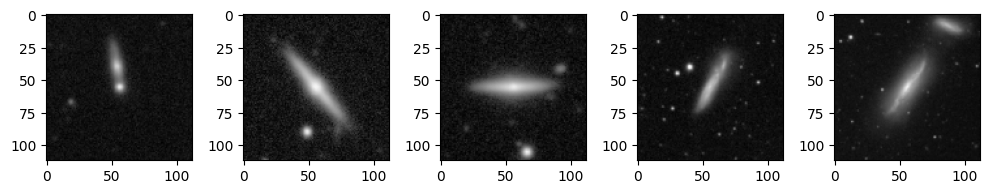

reconstructed: edge_on_disk


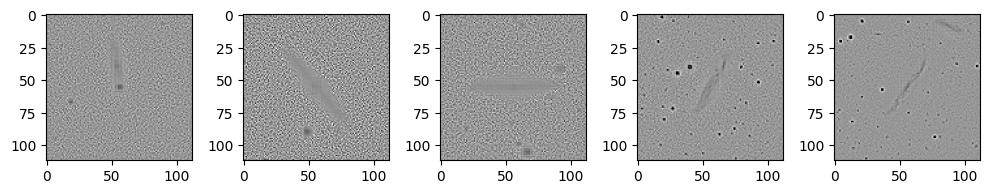

                       ______________________________________________________________________________     
Origina: unbarred_spiral


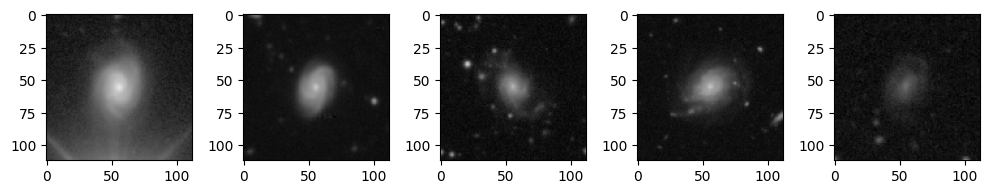

reconstructed: unbarred_spiral


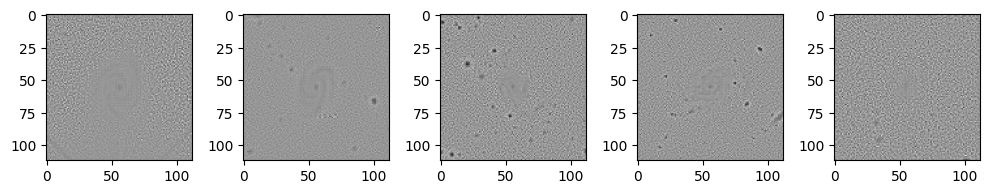

                       ______________________________________________________________________________     


In [147]:
for classArr in [ [class0_tr,0], [class1_tr,1], [class2_tr,2], [class3_tr,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        original_image = images_trainPre[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(original_image*255,cmap='gray', vmin=0, vmax=255 )
    print("Origina: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    # modes: reflect, constant, nearest, mirror, wrap, grid-constant, grid-mirror, grid-wrap
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        pre_image = ndimage.laplace(images_trainPre[classArr[0][0][i]] ,mode = 'nearest'  )*255+150
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image,cmap='gray', vmin=0, vmax=255 )
    print("reconstructed: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    
    print("                       ______________________________________________________________________________     ")


---

#### [gaussian_gradient_magnitude](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_gradient_magnitude.html#scipy.ndimage.gaussian_gradient_magnitude)

Origina: smooth_round


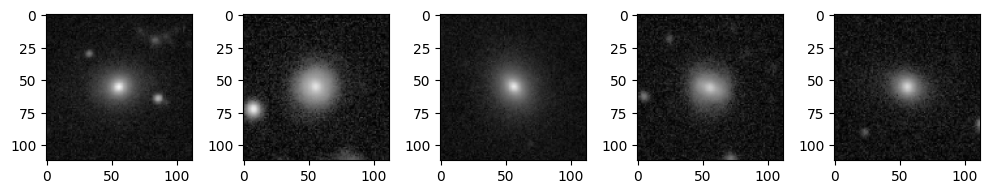

reconstructed: smooth_round


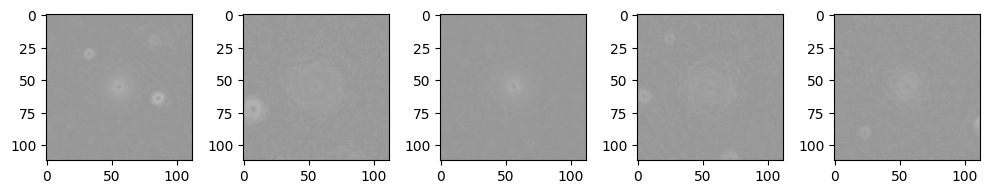

                       ______________________________________________________________________________     
Origina: smooth_cigar


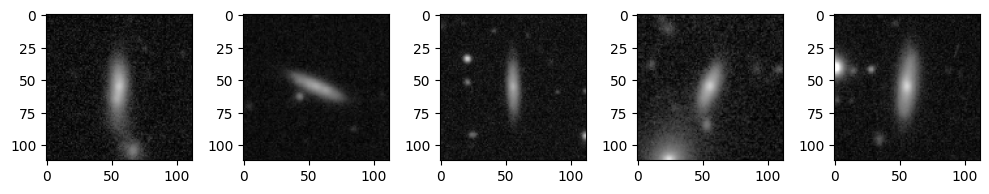

reconstructed: smooth_cigar


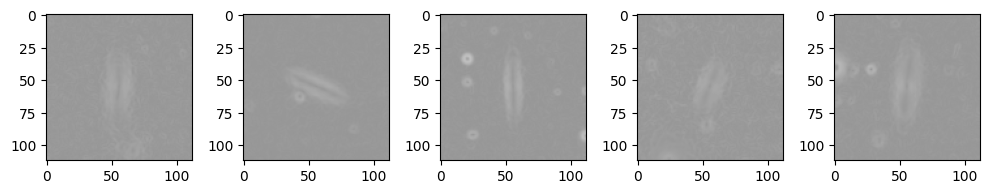

                       ______________________________________________________________________________     
Origina: edge_on_disk


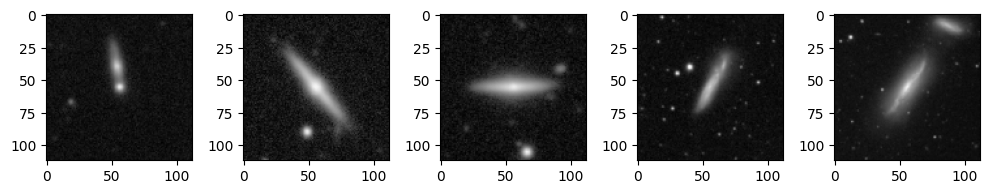

reconstructed: edge_on_disk


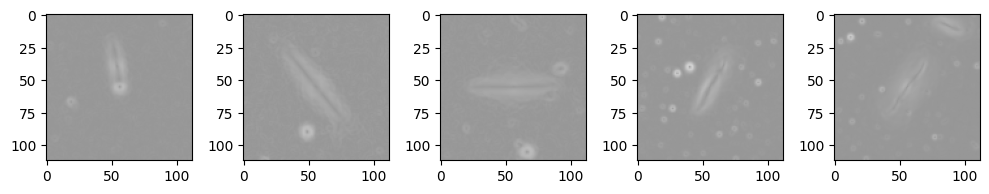

                       ______________________________________________________________________________     
Origina: unbarred_spiral


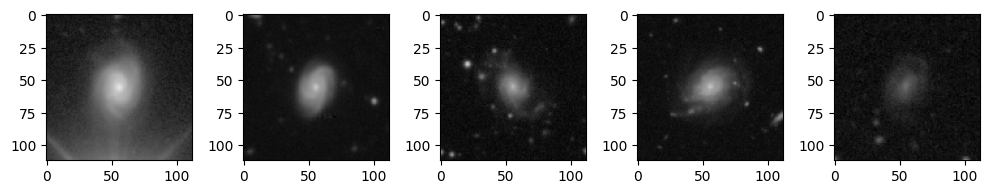

reconstructed: unbarred_spiral


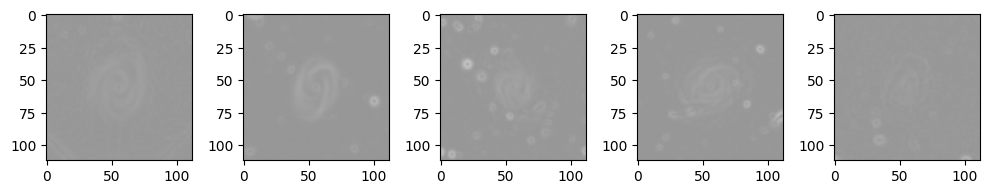

                       ______________________________________________________________________________     


In [148]:
for classArr in [ [class0_tr,0], [class1_tr,1], [class2_tr,2], [class3_tr,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        original_image = images_trainPre[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(original_image*255,cmap='gray', vmin=0, vmax=255 )
    print("Origina: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    # reflect, constant, nearest, mirror, wrap, grid-constant, grid-mirror, grid-wrap
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        pre_image = ndimage.gaussian_gradient_magnitude(images_trainPre[classArr[0][0][i]], sigma=1, mode = 'reflect'  )*255+150
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image,cmap='gray', vmin=0, vmax=255 )
    print("reconstructed: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    
    print("                       ______________________________________________________________________________     ")

---

#### [fourier_gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.fourier_gaussian.html#scipy.ndimage.fourier_gaussian)

Origina: smooth_round


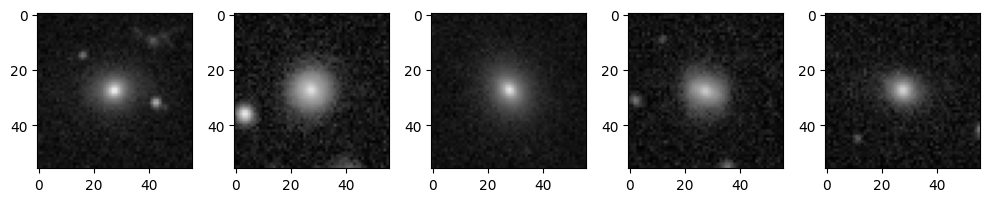

reconstructed: smooth_round


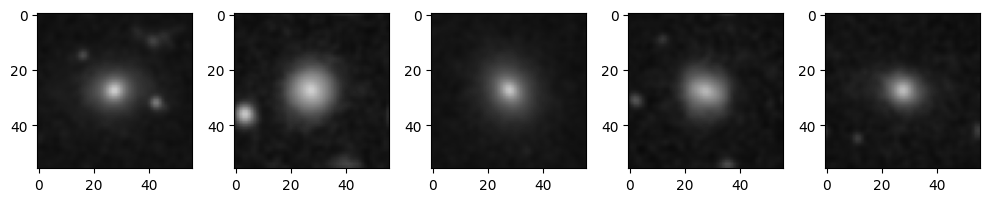

                       ______________________________________________________________________________     
Origina: smooth_cigar


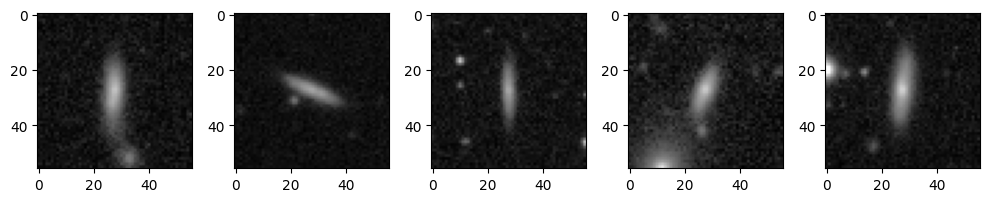

reconstructed: smooth_cigar


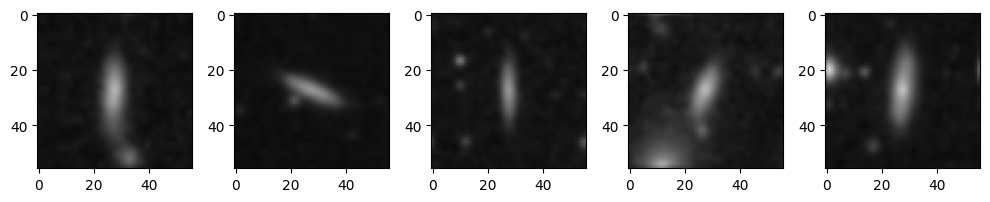

                       ______________________________________________________________________________     
Origina: edge_on_disk


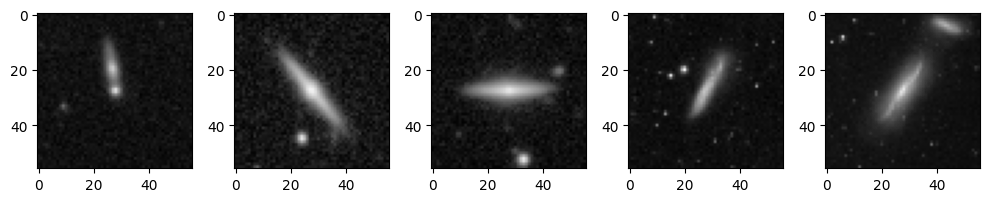

reconstructed: edge_on_disk


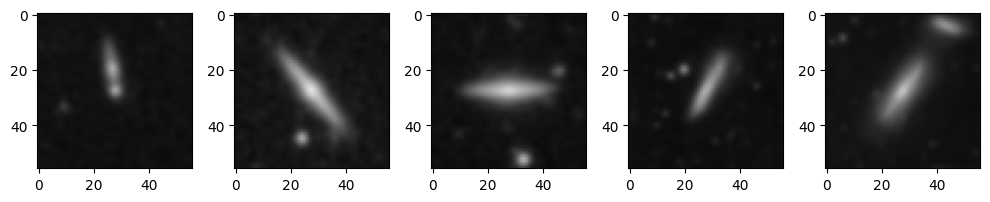

                       ______________________________________________________________________________     
Origina: unbarred_spiral


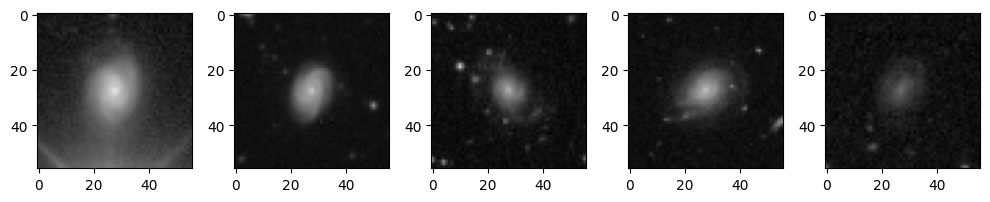

reconstructed: unbarred_spiral


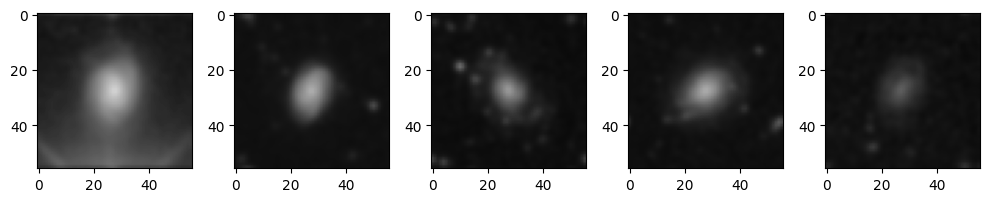

                       ______________________________________________________________________________     


In [120]:
for classArr in [ [class0_tr,0], [class1_tr,1], [class2_tr,2], [class3_tr,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        original_image = images_trainPre[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(original_image*255,cmap='gray', vmin=0, vmax=255 )
    print("Origina: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    # reflect, constant, nearest, mirror, wrap, grid-constant, grid-mirror, grid-wrap
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        input_ = np.fft.fft2(images_trainPre[classArr[0][0][i]]*255)
        pre_image = ndimage.fourier_gaussian(input_, sigma=1 )
        pre_image = np.fft.ifft2(pre_image)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image.real,cmap='gray', vmin=0, vmax=255 )
    print("reconstructed: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    
    print("                       ______________________________________________________________________________     ")

#### [fourier_uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.fourier_uniform.html#scipy.ndimage.fourier_uniform)

Origina: smooth_round


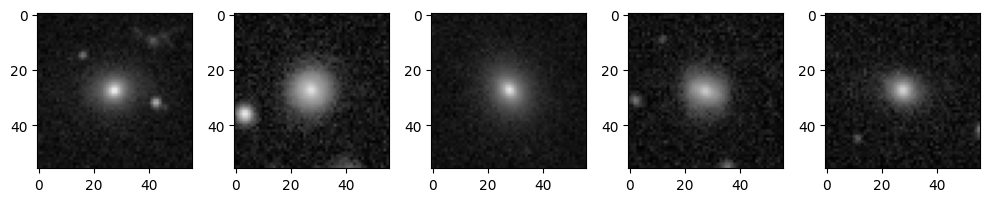

reconstructed: smooth_round


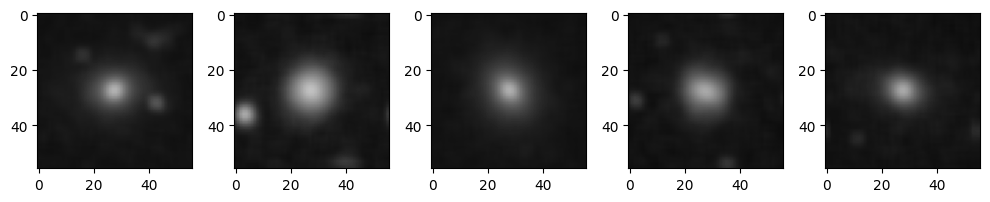

                       ______________________________________________________________________________     
Origina: smooth_cigar


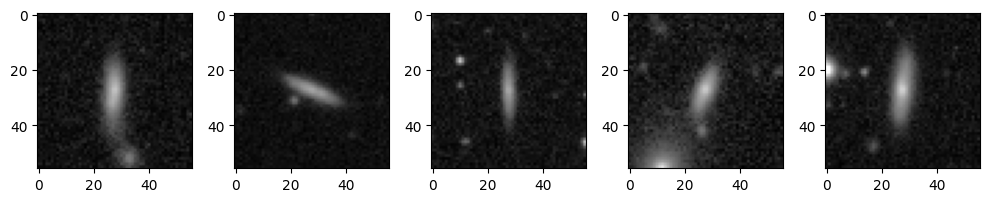

reconstructed: smooth_cigar


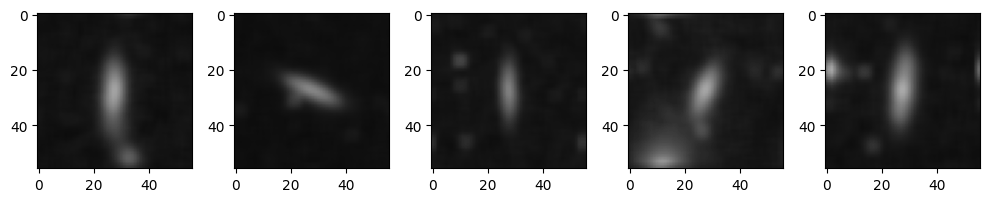

                       ______________________________________________________________________________     
Origina: edge_on_disk


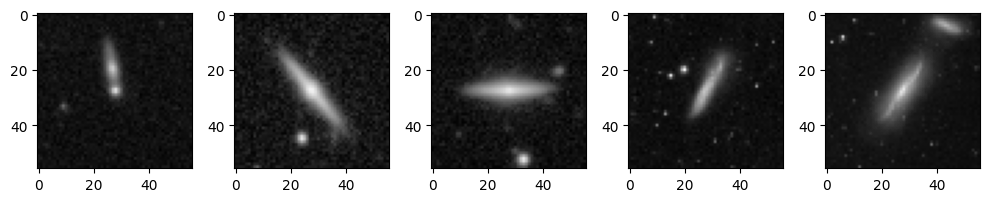

reconstructed: edge_on_disk


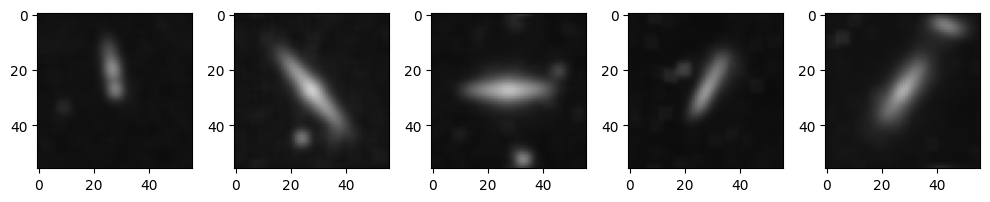

                       ______________________________________________________________________________     
Origina: unbarred_spiral


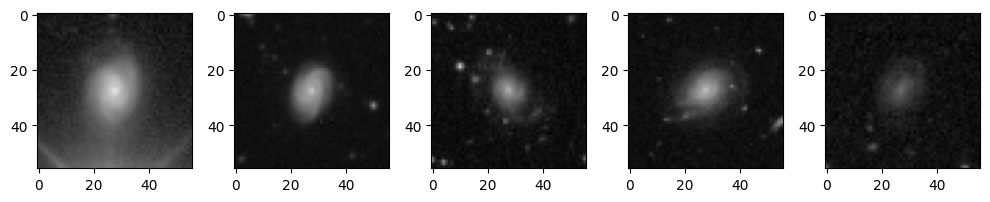

reconstructed: unbarred_spiral


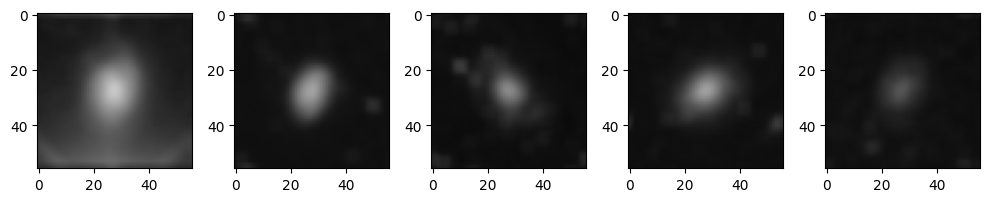

                       ______________________________________________________________________________     


In [126]:
for classArr in [ [class0_tr,0], [class1_tr,1], [class2_tr,2], [class3_tr,3]]:
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        original_image = images_trainPre[classArr[0][0][i]]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(original_image*255,cmap='gray', vmin=0, vmax=255 )
    print("Origina: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    # reflect, constant, nearest, mirror, wrap, grid-constant, grid-mirror, grid-wrap
    fig = plt.figure(figsize=(10, 10))
    for i in range (5):
        input_ = np.fft.fft2(images_trainPre[classArr[0][0][i]]*255)
        pre_image = ndimage.fourier_uniform(input_ , size=5)
        pre_image = np.fft.ifft2(pre_image)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(pre_image.real,cmap='gray', vmin=0, vmax=255 )
    print("reconstructed: "+str(GalaxyMNISTHighrez.classes[classArr[1]]))
    plt.tight_layout()
    plt.show()
    
    print("                       ______________________________________________________________________________     ")

---

---

#### **_Save the data that you think will give the best performance_**